### 데이터 불러오기

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [68]:
train = pd.read_csv('./data/train2.csv')

In [69]:
train.head()

,Unnamed: 0,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1154,1155,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,830,831,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,1162,1163,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,599,600,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,1058,1059,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [70]:
train.shape

(1127, 11)

### 데이터 결측치 확인

In [71]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    #결측치가 있는 칼럼, 결측치 수
    
    a=enumerate(dataframe.columns)
    print(a)
    for i, col in enumerate(dataframe.columns):
    #enmerate 순서가 있는 자료형을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴합니다.        
        #각 칼럼별로 하나씩
        missing_values = sum(dataframe[col].isna())
        print(type(dataframe[col].isna()))
        #print(dataframe[col].isna()) <class 'pandas.core.series.Series'>
        #df.isna() 결측치 확인 Bool 반환 True=1이라 더해짐
        
        is_missing = True if missing_values >= 1 else False
        #표현주의 if missing_values >=1 is_missing = True ..
        
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
결측치가 존재하지 않습니다


In [72]:

True + True
type(train.columns)

pandas.core.indexes.base.Index

### 데이터의 고유번호 id값 처리

In [73]:
train = train.drop(columns=['id','Unnamed: 0'],axis=1)
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,M,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,F,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,I,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,M,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


### Target 분포 확인

In [74]:
temp = train['Target'].unique()

In [75]:
train.groupby('Target').count().iloc[:,0]


Target
3       4
4      14
5      35
6      78
7      92
8     156
9     183
10    181
11    129
12     68
13     58
14     38
15     21
16     19
17     13
18     10
19      7
20     10
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

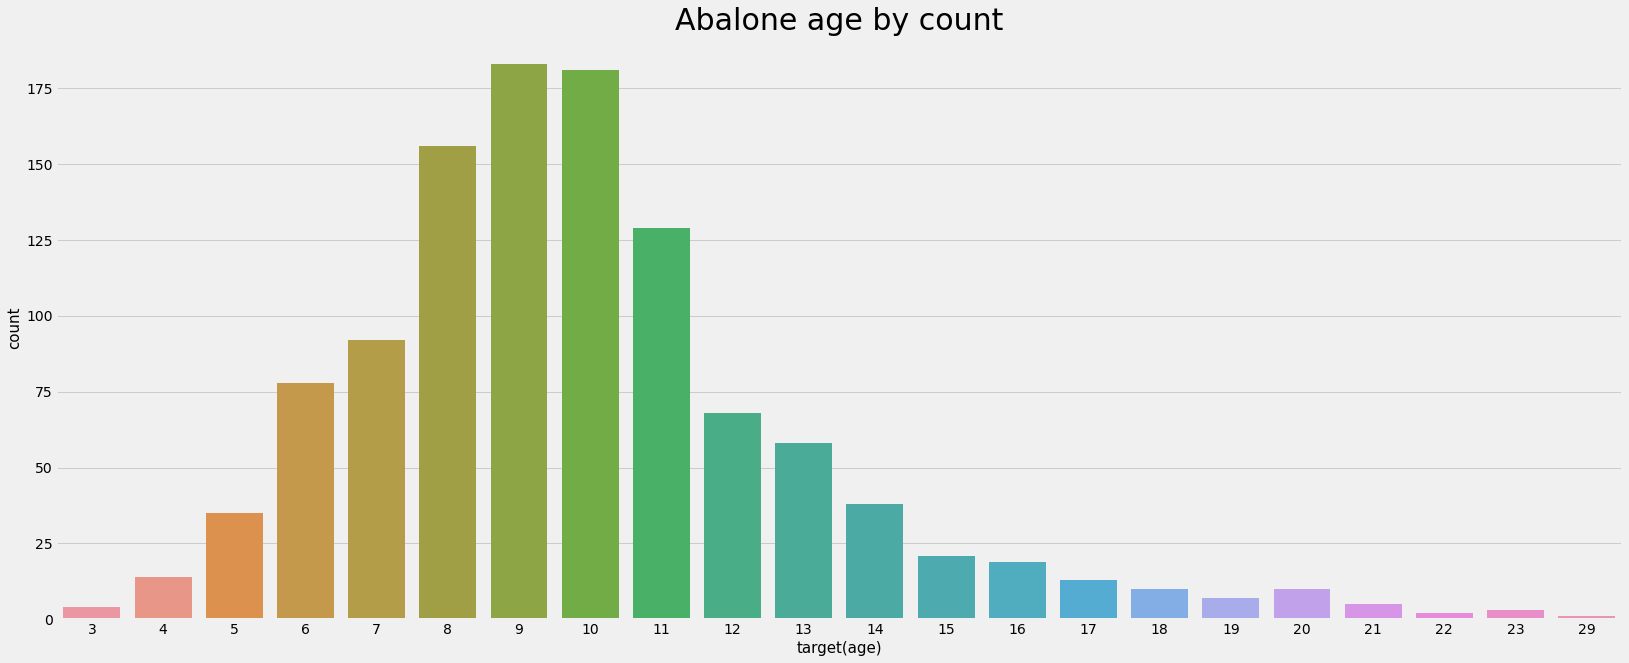

In [76]:
# 전복의 나이 분포 시각화
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target' , data=train)
plt.title('Abalone age by count', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.show()

In [77]:
##추가

In [78]:
temp1 = train['Target'] == 29
temp2 = train['Target'] == 23
train[temp1 | temp2] # 가장 나이가 많은 29세와 23세의 데이터 프레임을 합쳐서 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
505,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
598,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
775,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23
1010,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23


In [79]:
train[train['Target'] == 3] # 가장 나이가 작은 3세의 데이터 프레임을 보겠습니다.

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
236,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
403,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
1094,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
1105,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


In [80]:
# Gender가 23,29세인 전복이 모두 F -> F가 더 오래 산다?
train.dtypes


Gender             object
Lenght            float64
Diameter          float64
Height            float64
Whole Weight      float64
Shucked Weight    float64
Viscra Weight     float64
Shell Weight      float64
Target              int64
dtype: object

## 데이터 기초 통계 분석

### 카테고리형 데이터 Gender 시각화

In [81]:
#print(train['Gender'].unique()) # Gender의 중복되지 않은 값을 출력합니다.
#print(train.groupby('Gender').count().iloc[:,-1])
print(train.groupby('Gender'))

In [82]:
#train.groupby('Gender').count().iloc[:,-1]
train.groupby('Gender').count()

#train.groupby('Gender').count().iloc[:,-1]
#마지막 열 만 카운트, Targ


,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Gender,,,,,,,,
F,344,344,344,344,344,344,344,344
I,365,365,365,365,365,365,365,365
M,418,418,418,418,418,418,418,418


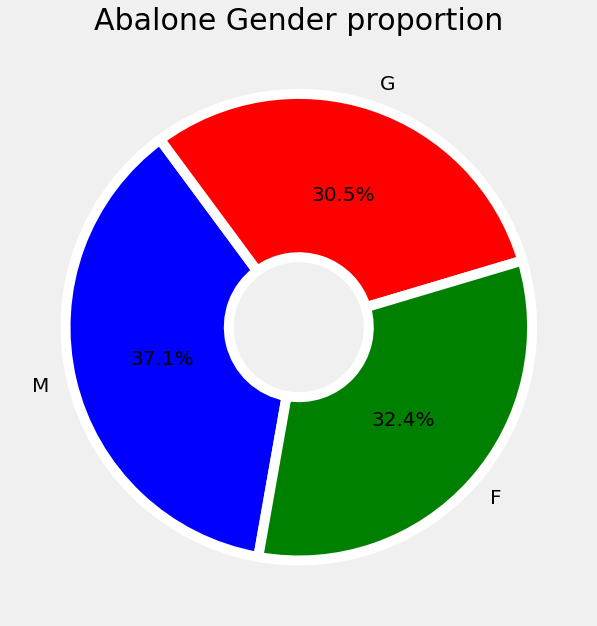

In [83]:
gt=train.groupby('Gender')['Target'].count()
ratio = [gt['M'],gt['F'],gt['I']]
labels = ['M','G','F']
colors = ['blue', 'red', 'green']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 10}

plt.title('Abalone Gender proportion', fontsize=30)
plt.pie(ratio, labels=labels, autopct='%.1f%%',textprops={'fontsize': 20}, startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

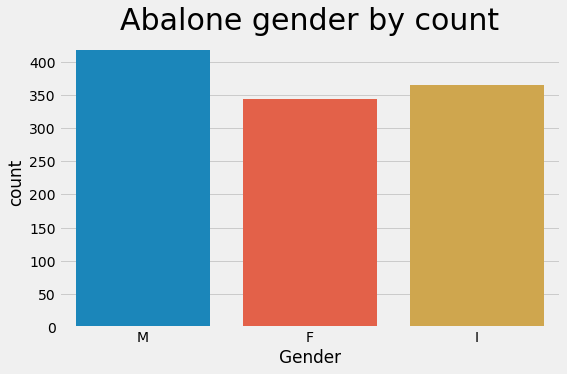

In [84]:
# 성별 데이터 개수 그래프
plt.rcParams['figure.figsize'] = [8,5]
#"figure.figsize"	그림(figure)의 크기. (가로,세로) 인치 단위

sns.countplot('Gender', data=train)
plt.title('Abalone gender by count', fontsize=30)
plt.show()

In [85]:
#print(type(train.groupby('Gender')['Target'].mean()))

#train.loc[train.Gender=='F']['Target'].mean()
#train.groupby('Gender')['Target'].mean()

means_by_Gender=train.groupby('Gender')['Target'].mean()
means_by_Gender['I']

7.926027397260274

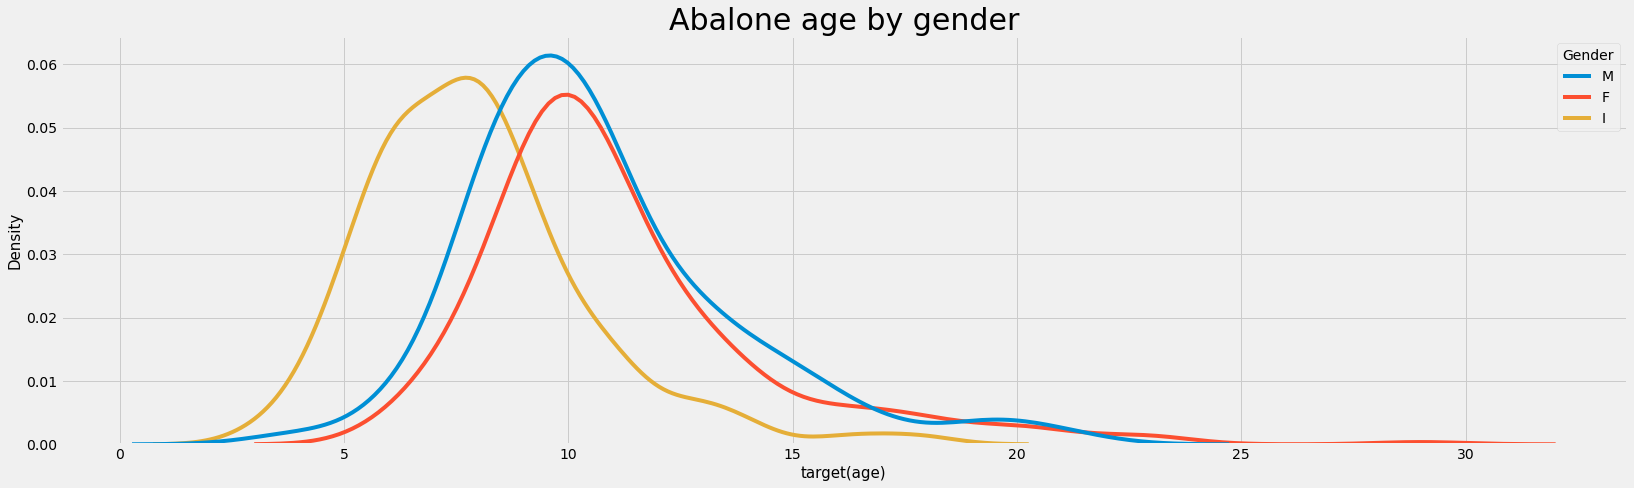

In [86]:
# 성별에 따른 나이 분포 그래프
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
#mean_sales = int(np.mean(df['sales']))
#plt.axvline()

#plt.axvline(x=train['target=I'].target.mean(),color='black')

plt.show()

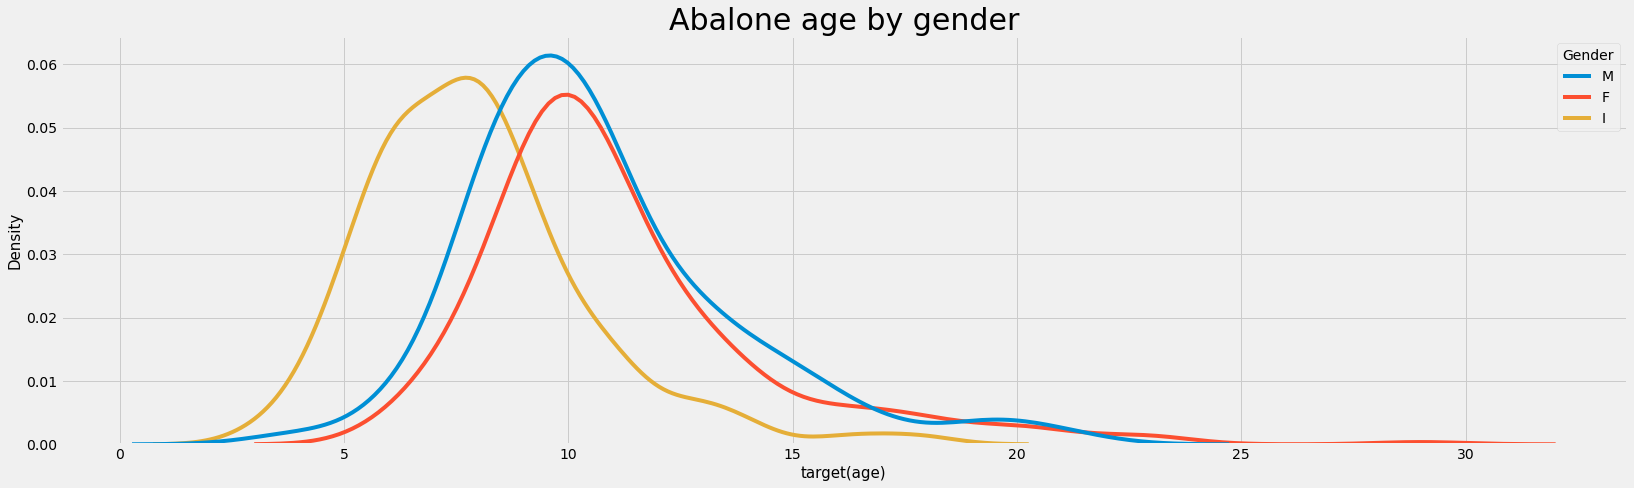

In [87]:
plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot('Target', hue='Gender', data=train)
plt.title('Abalone age by gender', fontsize=30)
plt.xlabel('target(age)', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.show()

### 수치형 데이터 시각화

In [88]:
data_description = train.describe()
data_description
# 각 컬럼의 평균값, 최대치, 최소치, 편차

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000,1127.000000
mean,0.522924,0.407036,0.139476,0.831996,0.358900,0.181458,0.239849,9.921029
std,0.121090,0.100372,0.039082,0.502113,0.225445,0.112655,0.142285,3.236664
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.112500,0.440250,0.180750,0.092500,0.127500,8.000000
50%,0.540000,0.420000,0.140000,0.777500,0.326500,0.168500,0.230500,10.000000
75%,0.615000,0.480000,0.165000,1.167000,0.503500,0.259000,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


### 데이터 분포 확인

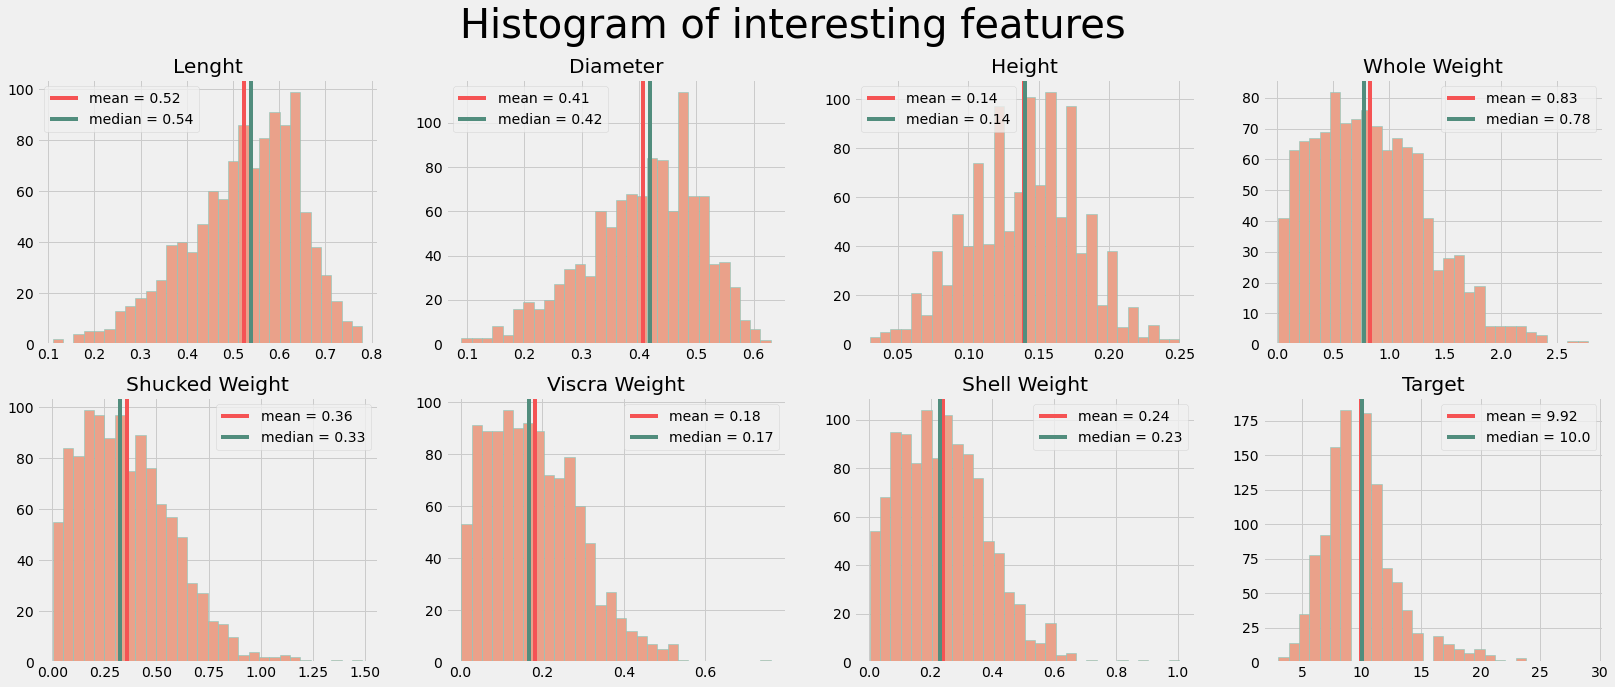

In [89]:
# 수치형 데이터 통계치 그래프
interest_coloumns = train.columns[1:]
plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(2, 4, figsize = (25, 10))
fig.suptitle('Histogram of interesting features', fontsize=40)
column_idx = 0
for i in range(2):
    for j in range(4):
        ax[i][j].hist(train[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1


In [90]:
## 나이별 - feature

  #scatter_kws={'s':2} 마커사이즈
  #lowess=True를 하면 추세선을 선형이 아닌 국소 회귀 
  #추세선없에 싶을땐 scatterplot
  #ax 그래프여러개?

## **수치형 데이터 시각화**

### scatter plot

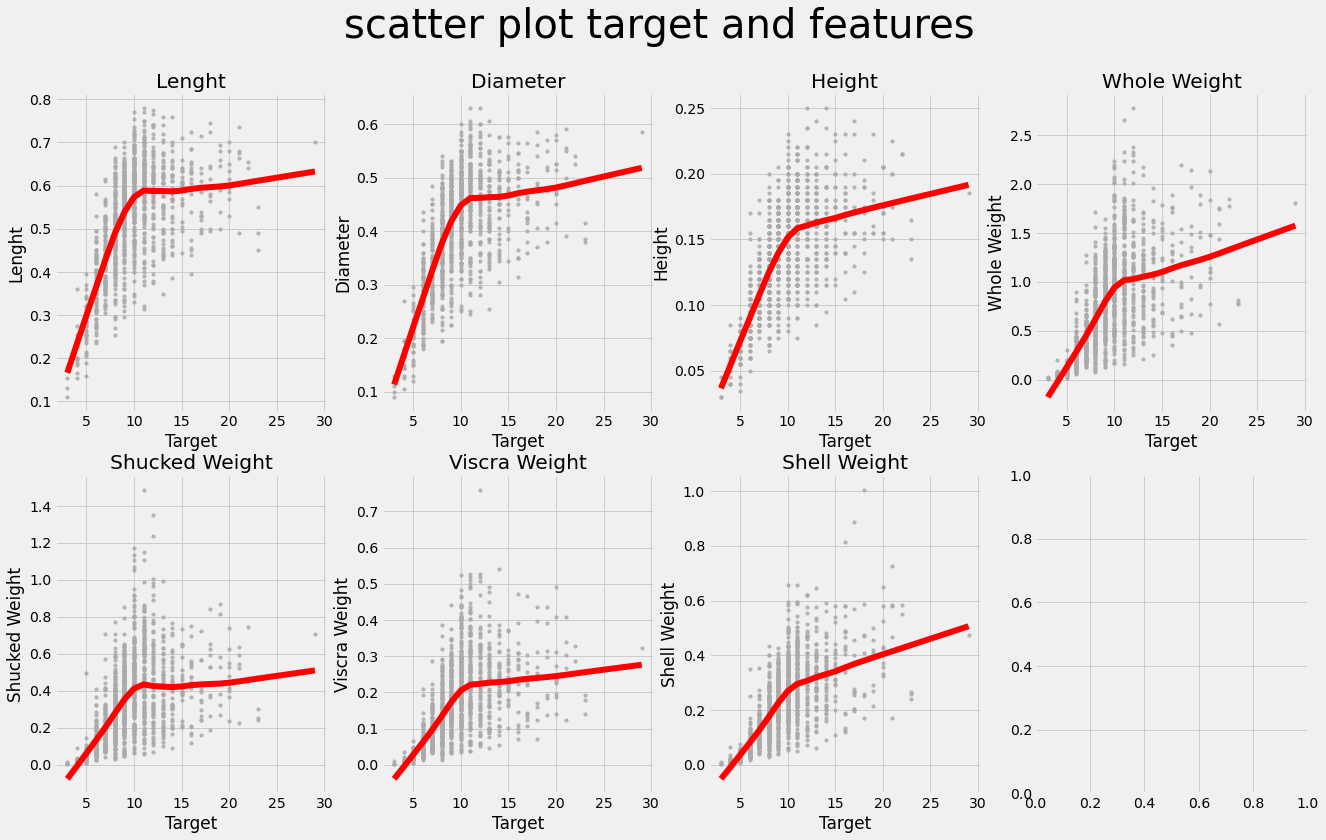

In [91]:
def visualize(axx, yfield):
  sns.regplot(x='Target', y=yfield, data=train,lowess=True,color='#AAAAAA',scatter_kws={'s':10}, line_kws= {'color': 'red'},ax=axx) 
  axx.set_title(yfield)

figure, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('scatter plot target and features', fontsize=40)
for i in range(len(train.columns[1:-1])):
  visualize(eval(f'ax{i+1}'), train.columns[i+1])

### 히트맵

Text(0.5, 1.0, 'Correlation between features')

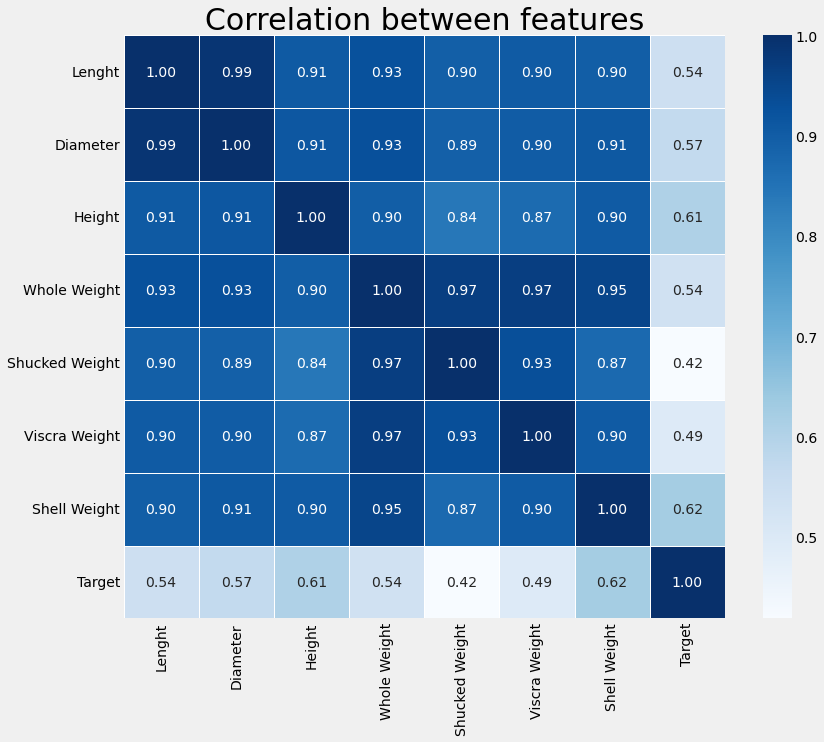

In [92]:
# 수치형 데이터 상관관계 히트맵 시각화
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

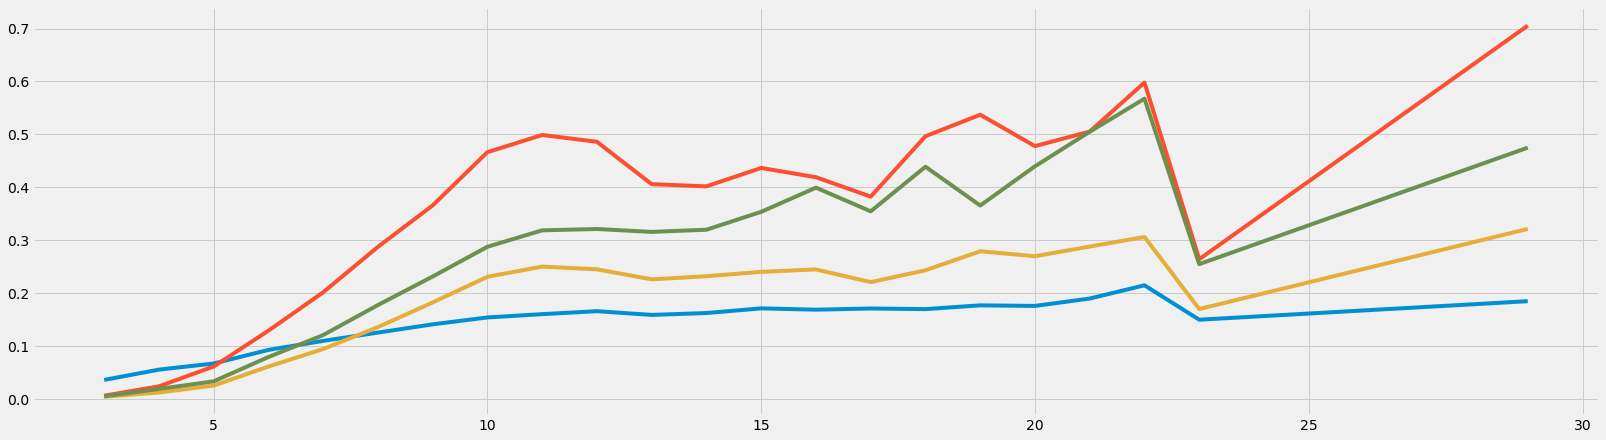

In [93]:
cc = train.groupby('Target')['Lenght'].mean()
dd = train.groupby('Target')['Diameter'].mean()
aa = train.groupby('Target')['Height'].mean()

bb = train.groupby('Target')['Whole Weight'].mean()
ff = train.groupby('Target')['Shucked Weight'].mean()
gg = train.groupby('Target')['Viscra Weight'].mean()

sw = train.groupby('Target')['Shell Weight'].mean()


plt.plot(aa)
#plt.plot(bb)
#plt.plot(cc)
#plt.plot(dd)
plt.plot(ff)
plt.plot(gg)
plt.plot(sw)

In [94]:
train2 = train.drop('Gender',axis=1)
#train2 = train2.drop('Water',axis=1)

#train2.head()
#train2.columns.get_loc('Target')
train2.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,14
1,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,9
2,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,9
3,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,6
4,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,9


In [95]:
##칼럼추가 

#train2["Water"] = round(train2["Whole Weight"] - (train2["Shucked Weight"] + train2["Shell Weight"]),4)
#print(train2.head())

#train2.insert(train2.columns.get_loc('Target'),'Water',round(train2["Whole Weight"] - (train2["Shucked Weight"] + train2["Shell Weight"]),4))
#맨뒤에 삽입

train2.insert(len(train2.columns)-1,'Water',round(train2["Whole Weight"] - (train2["Shucked Weight"] + train2["Shell Weight"]),4))
train2.insert(len(train2.columns)-1,'W-W',round((train2["Whole Weight"] - train2['Water']),4))
#train2.insert(len(train2.columns)-1,'ratio',round((train2["Whole Weight"]-train2["Shell Weight"])/train2["Whole Weight"],4))


#train2.columns = ['Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight','Water','Target']
train2.head()

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Water,W-W,Target
0,0.570,0.480,0.180,0.9395,0.3990,0.2000,0.2950,0.2455,0.6940,14
1,0.560,0.425,0.135,0.9415,0.5090,0.2015,0.1975,0.2350,0.7065,9
2,0.655,0.510,0.150,1.0430,0.4795,0.2230,0.3050,0.2585,0.7845,9
3,0.310,0.225,0.050,0.1445,0.0675,0.0385,0.0450,0.0320,0.1125,6
4,0.310,0.225,0.075,0.1295,0.0455,0.0335,0.0440,0.0400,0.0895,9


### **수치형 데이터 간 상관관계: 히트맵**

Text(0.5, 1.0, 'Correlation between features')

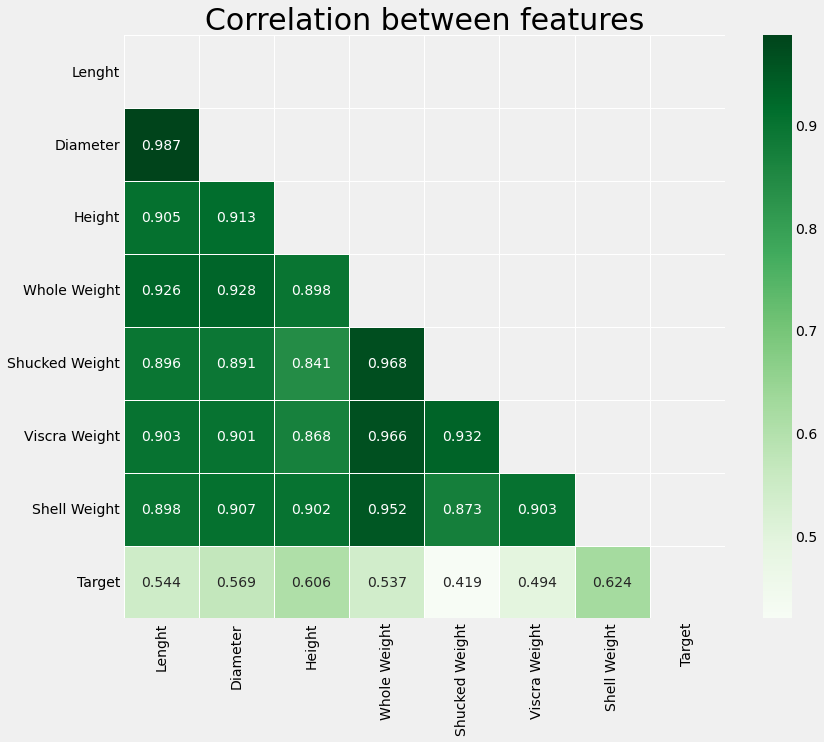

In [96]:
# 수치형 데이터 상관관계 히트맵
train_corr = train.drop(columns=['Gender'],axis=1)
scaler= MinMaxScaler() 
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method= 'pearson')

mask = np.zeros_like(corr28)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(data = corr28, annot=True, mask=mask, fmt = '.3f', linewidths=.5, cmap='Greens')
plt.title('Correlation between features', fontsize=30)

In [97]:
# Target과 피쳐들의 상관관계
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.624020
Height,0.606440
Diameter,0.569380
Lenght,0.544288
Whole Weight,0.536748
Viscra Weight,0.494249
Shucked Weight,0.418847


shell Weight가 가장 높은 양의 상관관계